## S14a: Lab 2 - Pricing, houses


### 1. Let's start by reading in our data

In [ ]:
# Imports

import numpy as np
import pandas as pd

In [ ]:
# Read in data with pandas

data = pd.read_csv('./data/Boston_March2018.csv')

# Preview

data.head()

In [ ]:
# View from another angle

data.iloc[100:].head()

### 2. Explore the data

In [ ]:
# Narrow the view

prices = ['LISTPRICE', 'SOLDPRICE']
data[prices].head()

In [ ]:
# !YOUR TURN!
# Look at sum
np.sum(data['SOLDPRICE'].values)

# Look at mean
np.mean(data['SOLDPRICE'].values)

In [ ]:
# Let's take a look at the property types

proptypes = data.PROPTYPE.unique()
proptypes

In [ ]:
# Tinker around with some filtering options

data[(data.SOLDPRICE < 1000000) & (data.PROPTYPE == "SF")]

In [ ]:
# Look at everything

data.describe()

In [ ]:
# Group by prop type

data_by_proptype = data.groupby('PROPTYPE')
data_by_proptype.describe()

In [ ]:
# Zoom in

data_by_proptype[['LISTPRICE', 'SOLDPRICE']].mean()

### 3. Introducing [Linear Regression](https://scikit-learn.org/stable/modules/linear_model.html) with Scikit Learn

In [5]:
# Import sklearn

from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score


In [6]:
# Define model

regr = linear_model.LinearRegression()


In [7]:
# Define label and features (adjustable)

label = ['SOLDPRICE']
features = ['BEDS', 'BATHS', 'SQFT', 'AGE', 'LOTSIZE', 'GARAGE']


In [8]:
# Filter out empties

filter_data = data.copy()

# Additional
filter_data = filter_data[filter_data['SOLDPRICE'] < 1000000]


# Apply to all
for f in features + label:
    # Out empties - (v. imputation)
    filter_data = filter_data[filter_data[f].notna()]
    
    # Interaction terms
    
    # Standardize
    filter_data[f] = (filter_data[f] - filter_data[f].mean()) / filter_data[f].std()
    
    # v. Normalize
    filter_data[f] = (filter_data[f] - filter_data[f].min()) / (filter_data[f].max() - filter_data[f].min())
    
filter_data = filter_data.reset_index()

print(filter_data[label + features].head())


   SOLDPRICE      BEDS     BATHS      SQFT       AGE   LOTSIZE    GARAGE
0   0.229297  0.666667  0.363636  0.493383  0.063339  0.000447  0.000000
1   0.513870  0.166667  0.272727  0.286807  0.015030  0.005688  0.222222
2   0.466783  0.166667  0.227273  0.206782  0.000537  0.001605  0.222222
3   0.157135  0.111111  0.090909  0.000000  0.000000  0.000000  0.000000
4   0.518989  0.166667  0.227273  0.272849  0.008052  0.001002  0.222222


In [9]:
# Extract features and label

label = filter_data[label]
features = filter_data[features]


In [10]:
# !YOUR TURN!

# Take a look at the shapes for 'labels' and 'features'
label.shape, features.shape

((3838, 1), (3838, 6))

In [11]:
# Set up testing and training (adjustable)
split = int(len(filter_data) * 0.33)

features_train = features[:split]
features_test = features[split:]
label_train = label[:split]
label_test = label[split:]

# Check shapes

print ("Train shape")
print (features_train.shape, label_train.shape)
print ("\nTest shape")
print (features_test.shape, label_test.shape)

Train shape
(1266, 6) (1266, 1)

Test shape
(2572, 6) (2572, 1)


In [13]:
# Fit training sets

regr.fit(features_train, label_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [18]:
label_train

,SOLDPRICE
0,0.229297
1,0.513870
2,0.466783
3,0.157135
4,0.518989
...,...
1261,0.794349
1262,0.878493
1263,0.304023
1264,0.565974


In [17]:
y_train

,BEDS,BATHS,SQFT,AGE,LOTSIZE,GARAGE
0,0.666667,0.363636,0.493383,0.063339,0.000447,0.000000
1,0.166667,0.272727,0.286807,0.015030,0.005688,0.222222
2,0.166667,0.227273,0.206782,0.000537,0.001605,0.222222
3,0.111111,0.090909,0.000000,0.000000,0.000000,0.000000
4,0.166667,0.227273,0.272849,0.008052,0.001002,0.222222
...,...,...,...,...,...,...
1299,0.111111,0.136364,0.119520,0.090177,0.000000,0.000000
1300,0.166667,0.181818,0.171940,0.038647,0.000289,0.000000
1301,0.166667,0.181818,0.152192,0.035427,0.000466,0.111111
1302,0.166667,0.181818,0.161290,0.048846,0.000311,0.111111


In [14]:
# Make predictions using testing set

label_pred = regr.predict(features_test)

# Explained variance score: 1 is perfect prediction

print('Variance score: %.2f' % r2_score(label_test, label_pred))


Variance score: 0.29


### 4. Plot, aka "Visualize"

In [ ]:
# Import
import matplotlib.pyplot as plt

In [ ]:

# Plot outputs
plt.figure(figsize=(20, 5))
plt.scatter(label_test, label_pred, color='black')
plt.plot([label_test.min(), label_test.max()], [label_test.min(), label_test.max()], 'k--', lw=4, color='blue')

plt.ylabel('Predicted')
plt.xlabel('Measured')

plt.xticks(())
plt.yticks(())

plt.show()

In [ ]:
# Residual plot

plt.figure(figsize=(10, 7))

resid = label_test - regr.predict(features_test)

plt.axhline(y=0, linestyle='-', linewidth=2, color="r")
plt.scatter(x=label_pred, y=resid, alpha=0.5, s=3)

plt.title("Residual plot")
plt.ylabel(r"Y-$\hat Y$")
plt.xlabel(r'$\hat Y$')
plt.tight_layout()
plt.show()

### 7. Export

In [ ]:
# Download model as pkl file

import joblib
joblib.dump(regr, 'regr.pkl')

# HOMEWORK 1

### 6. Train Test Split

Train shape
(1304, 6) (1304, 1)

Test shape
(2534, 6) (2534, 1)
Variance score: 0.29
MSE score: 0.03


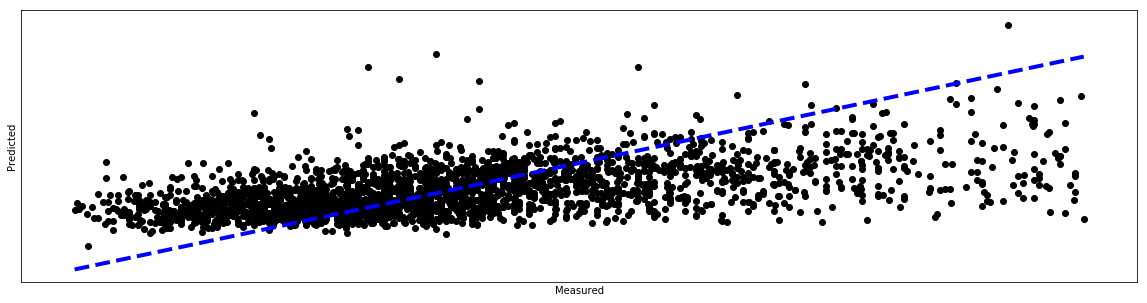

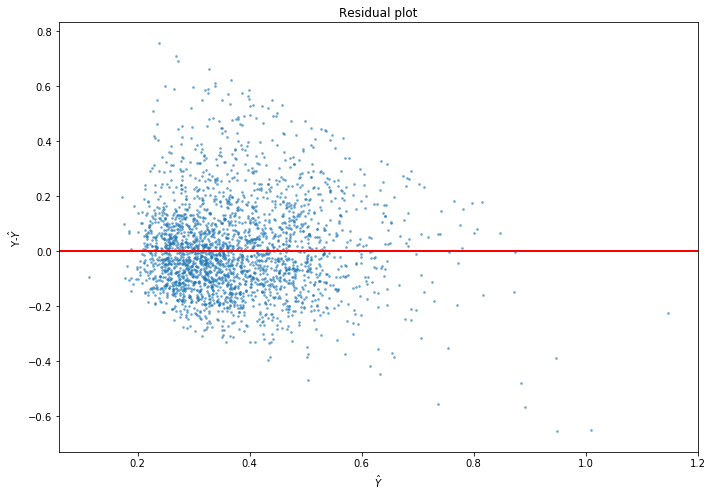

[1959.7]


In [4]:
# YOUR TURN
# Use sklearn train|test|split
# Ref. https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import pandas as pd

# from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split

# Init x, y test,train @ 33% size (sklearn)
data = pd.read_csv('./data/Boston_March2018.csv')
label = ['SOLDPRICE']
features = ['BEDS', 'BATHS', 'SQFT', 'AGE', 'LOTSIZE', 'GARAGE']

# Filter out empties

filter_data = data.copy()

# Additional
filter_data = filter_data[filter_data['SOLDPRICE'] < 1000000]

# Apply to all
for f in features + label:
    # Out empties - (v. imputation)
    filter_data = filter_data[filter_data[f].notna()]
    
    # Interaction terms
    
    # Standardize
    filter_data[f] = (filter_data[f] - filter_data[f].mean()) / filter_data[f].std()
    
    # v. Normalize
    filter_data[f] = (filter_data[f] - filter_data[f].min()) / (filter_data[f].max() - filter_data[f].min())
    
filter_data = filter_data.reset_index()

label = filter_data[label]
features = filter_data[features]

X_train, X_test, y_train, y_test = train_test_split(
    features, label, test_size=0.66, shuffle=False)

print ("Train shape")
print (X_train.shape, y_train.shape)
print ("\nTest shape")
print (X_test.shape, y_test.shape)

# Determine linear_model (sklearn - above))
regr = linear_model.LinearRegression()

# Train linear_model (sklearn)
regr.fit(X_train, y_train)
label_pred = regr.predict(X_test)

# Score Method 1: (sklearn)
# Ref. https://stackoverflow.com/questions/45529907/difference-between-model-score-vs-r2-score
#  https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
print('Variance score: %.2f' % r2_score(y_test, label_pred))

# Score Method 2 (sklearn)
print('MSE score: %.2f' % mean_squared_error(y_test, label_pred))

# Plot outputs (matplotlab - above)
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 5))
plt.scatter(y_test, label_pred, color='black')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4, color='blue')

plt.ylabel('Predicted')
plt.xlabel('Measured')

plt.xticks(())
plt.yticks(())

plt.show()

# Residual plot

plt.figure(figsize=(10, 7))

resid = y_test - regr.predict(X_test)

plt.axhline(y=0, linestyle='-', linewidth=2, color="r")
plt.scatter(x=label_pred, y=resid, alpha=0.5, s=3)

plt.title("Residual plot")
plt.ylabel(r"Y-$\hat Y$")
plt.xlabel(r'$\hat Y$')
plt.tight_layout()
plt.show()

# Download model as pkl file
import joblib
joblib.dump(regr, 'regr_lab2_prob1.pkl')

prediction = regr.predict([[4, 2.5, 3005, 15, 17903.0, 1]])[0].round(1)
prediction = str(prediction)
print(prediction)

### 7. Decision Tree

Train shape
(1304, 6) (1304, 1)

Test shape
(2534, 6) (2534, 1)
Variance score: -0.26
MSE score: 0.05


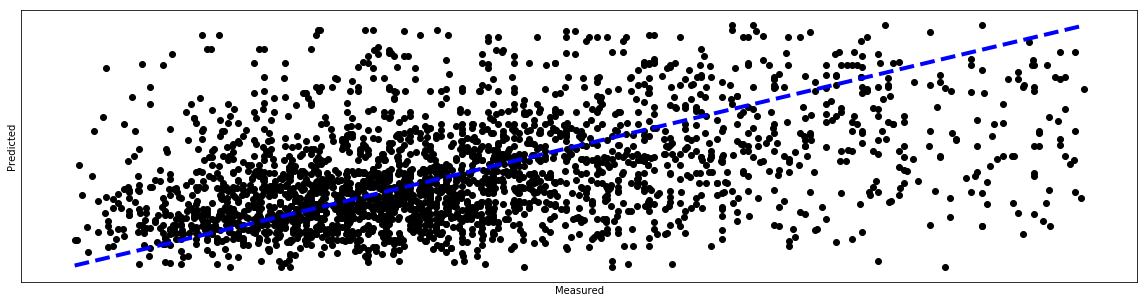

0.8


In [2]:
# YOUR TURN
# Run DecisionTreeRegressor
# HINT: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html
from sklearn.tree import DecisionTreeRegressor
from sklearn import datasets
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import pandas as pd

# from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split

# Init x, y test,train @ 33% size (sklearn)
data = pd.read_csv('./data/Boston_March2018.csv')
label = ['SOLDPRICE']
features = ['BEDS', 'BATHS', 'SQFT', 'AGE', 'LOTSIZE', 'GARAGE']

# Filter out empties

filter_data = data.copy()

# Additional
filter_data = filter_data[filter_data['SOLDPRICE'] < 1000000]

# Apply to all
for f in features + label:
    # Out empties - (v. imputation)
    filter_data = filter_data[filter_data[f].notna()]
    
    # Interaction terms
    
    # Standardize
    filter_data[f] = (filter_data[f] - filter_data[f].mean()) / filter_data[f].std()
    
    # v. Normalize
    filter_data[f] = (filter_data[f] - filter_data[f].min()) / (filter_data[f].max() - filter_data[f].min())
    
filter_data = filter_data.reset_index()

label = filter_data[label]
features = filter_data[features]

X_train, X_test, y_train, y_test = train_test_split(
    features, label, test_size=0.66, shuffle=False)

print ("Train shape")
print (X_train.shape, y_train.shape)
print ("\nTest shape")
print (X_test.shape, y_test.shape)

# Create regressor
regr = DecisionTreeRegressor(random_state=0)

# Fit
regr.fit(X_train, y_train)

# Predictions
label_pred = regr.predict(X_test)
#print (label_pred.shape)

# Score
print('Variance score: %.2f' % r2_score(y_test, label_pred))

# Score Method 2 (sklearn)
print('MSE score: %.2f' % mean_squared_error(y_test, label_pred))

# Plot outputs (matplotlab - above)
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 5))
plt.scatter(y_test, label_pred, color='black')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4, color='blue')

plt.ylabel('Predicted')
plt.xlabel('Measured')

plt.xticks(())
plt.yticks(())

plt.show()


# Download model as pkl file
import joblib
joblib.dump(regr, 'regr_lab2_prob2.pkl')

prediction = regr.predict([[4, 2.5, 3005, 15, 17903.0, 1]])[0].round(1)
prediction = str(prediction)
print(prediction)

### Ref
    + https://stackoverflow.com/questions/26414913/normalize-columns-of-pandas-data-frame